In [13]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot
import pprint
from collections import Counter, OrderedDict
import json

In [3]:
data = pd.read_hdf('/scratch/gjr286/BandhubDataset.h5', 'bandhub')

In [4]:
data.columns

Index(['trackId', 'songId', 'masterOwner', 'trackOwner', 'artist', 'title',
       'subTitle', 'views', 'instrument', 'contentTags', 'audioURL',
       'processedAudioURL', 'trackVideoURL', 'startTime', 'trackDuration',
       'audioSampleRate', 'fromYouTube', 'isFinished', 'isPublished',
       'hasPublishedTracks', 'mixedAudioURL', 'mixedVideoURL', 'musicBrainzID',
       'newMusicBrainzID', 'publicSongCollectionIndex', 'volume1', 'volume2',
       'mute1', 'mute2', 'solo1', 'solo2', 'compressorValue1',
       'compressorValue2', 'panValue1', 'panValue2', 'echoValue1',
       'echoValue2', 'noiseGateValue1', 'noiseGateValue2', 'reverbValue1',
       'reverbValue2', 'eqValue1', 'eqValue2'],
      dtype='object')

In [5]:
# distribution of multitracks
def multiTrackLens(dummyData):
    groupedData = dummyData.groupby("songId")
    groupedData = pubData.groupby("songId") # number of multitrack distributions
    multiTrackLens = []
    for name,group in groupedData:
        multiTrackLens.append(len(group))
    return multiTrackLens

In [7]:
print('All Tracks:',len(data))
print('Published Tracks:',len(data.loc[data.isPublished == True]))

All Tracks: 597370
Published Tracks: 290616


In [79]:
# info for published tracks (currently downloaded)

In [9]:
#published tracks descriptive stats
pubData = data.loc[data.isPublished == True] #grab published tracks
multiTracks = multiTrackLens(pubData)
#print('median', np.median(nonYouTubeMultiTracks))
stats.describe(multiTracks)

DescribeResult(nobs=130379, minmax=(1, 65), mean=2.2290092729657385, variance=8.333539716269533, skewness=3.3506788101598612, kurtosis=16.826845389271856)

Text(0,0.5,'Frequency')

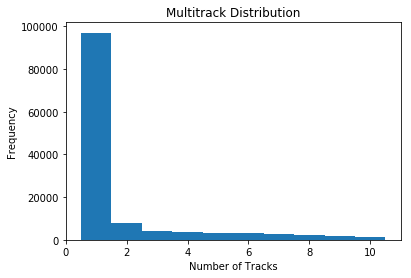

In [10]:
pyplot.hist(multiTracks,10, (0.5, 10.5))
pyplot.title("Multitrack Distribution")
pyplot.xlabel("Number of Tracks")
pyplot.ylabel("Frequency")

DescribeResult(nobs=290616, minmax=(-67.80525, 36480.683333), mean=219.34025613761114, variance=20693.567068933444, skewness=66.68518899595826, kurtosis=14565.549786935251)

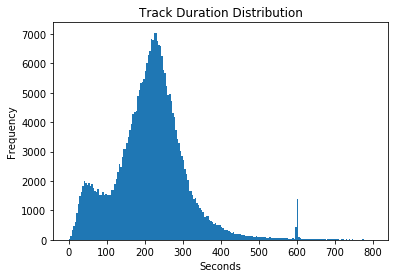

In [64]:
durationData = pubData.trackDuration
pyplot.hist(durationData, 200, (0, 800))
pyplot.title("Track Duration Distribution")
pyplot.xlabel("Seconds")
pyplot.ylabel("Frequency")
stats.describe(durationData)

In [11]:
#contentTagData.contentTags
#len(contentTagData)
#print(pd.unique(contentTagData.contentTags))
#To Do: unpack each dictionary, count, sort and plot like below

Number of Tracks with Content Tags: 5603


Text(0,0.5,'Frequency')

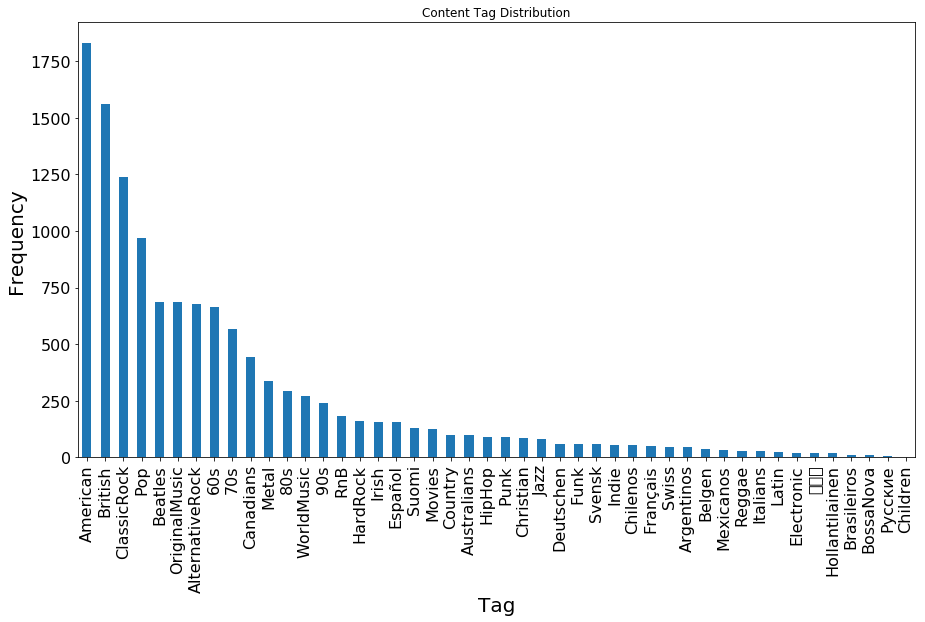

In [43]:
contentTagData = pubData.loc[pubData.contentTags != 'null']
print('Number of Tracks with Content Tags:', len(contentTagData))
contentTags = []
for i in contentTagData.contentTags:
    dummyStr = json.loads(i)
    for word in dummyStr:
        contentTags.append(word)
print('Number of Content Tags')
contentTagCounts = Counter(contentTags)
contentTagCounts = OrderedDict(contentTagCounts.most_common())
df = pd.DataFrame.from_dict(contentTagCounts, orient='index')
ax = df.plot(kind='bar', title = 'Content Tag Distribution', legend = False, figsize=(15,8), fontsize = 16)
ax.set_xlabel("Tag", fontsize = 20)
ax.set_ylabel("Frequency", fontsize = 20)   

Number of Tracks with Instrument Labels: 47645


Text(0,0.5,'Frequency')

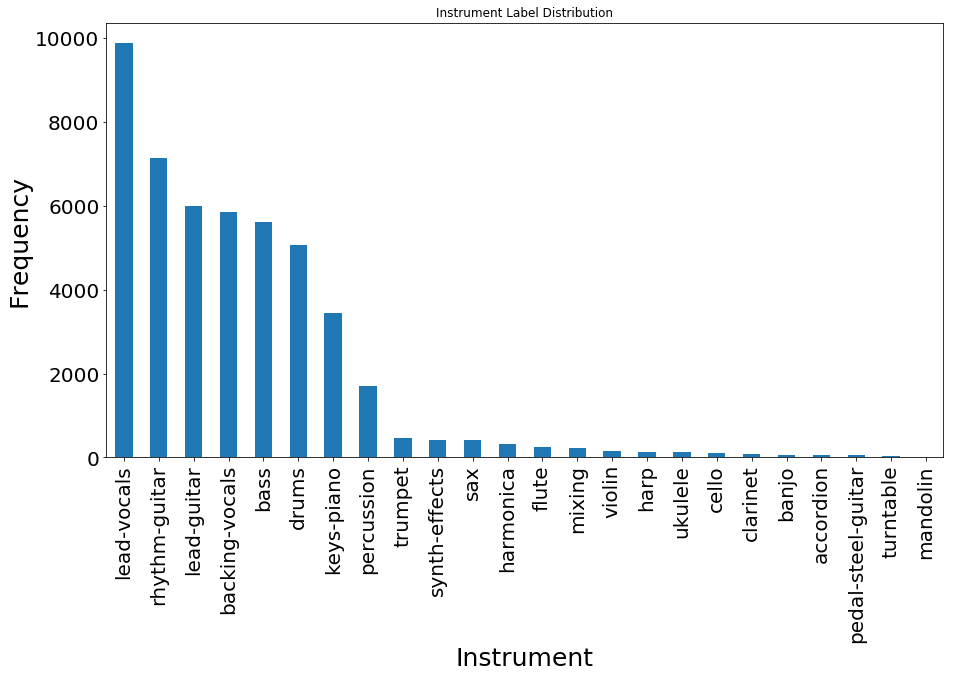

In [41]:
instrumentData = pubData.loc[pd.notnull(pubData.instrument)]
print('Number of Tracks with Instrument Labels:', len(instrumentData))
instrumentCounts = Counter(instrumentData.instrument)
instrumentCounts = OrderedDict(instrumentCounts.most_common())
df = pd.DataFrame.from_dict(instrumentCounts, orient='index')
ax = df.plot(kind='bar', title = 'Instrument Label Distribution', legend = False, figsize=(15,8), fontsize = 16)
ax.set_xlabel("Instrument", fontsize = 20)
ax.set_ylabel("Frequency", fontsize = 20)

In [58]:
nonYouTubeData = pubData.loc[pubData.fromYouTube == False] #grab published tracks
youTubeData = pubData.loc[pubData.fromYouTube == True] #grab published tracks
print('Non-YouTube Tracks:', len(nonYouTubeData))
print('YouTube Tracks:', len(youTubeData))

Non-YouTube Tracks: 167730
YouTube Tracks: 122886


DescribeResult(nobs=167730, minmax=(-67.80525, 2078.37), mean=200.62205108951477, variance=8884.718541402886, skewness=0.6478173647459473, kurtosis=6.211957293248785)

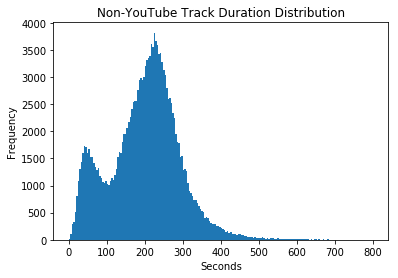

In [61]:
nonYouTubeDurationData = nonYouTubeData.trackDuration
pyplot.hist(durationData, 200, (0, 800))
pyplot.title("Non-YouTube Track Duration Distribution")
pyplot.xlabel("Seconds")
pyplot.ylabel("Frequency")
stats.describe(nonYouTubeDurationData)

In [132]:
nonYouTubeMultiTracks = multiTrackLens(nonYouTubeData)
print('median', np.median(nonYouTubeMultiTracks))
stats.describe(nonYouTubeMultiTracks)

median 1.0
DescribeResult(nobs=130379, minmax=(1, 65), mean=2.2290092729657385, variance=8.333539716269533, skewness=3.3506788101598612, kurtosis=16.826845389271856)


Text(0,0.5,'Frequency')

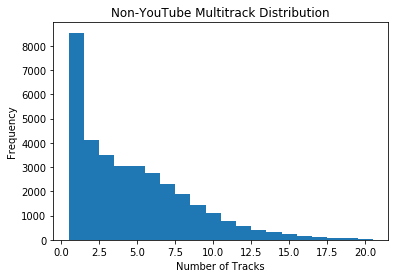

In [67]:
pyplot.hist(nonYouTubeMultiTracks,20, (0.5, 20.5))
pyplot.title("Non-YouTube Multitrack Distribution")
pyplot.xlabel("Number of Tracks")
pyplot.ylabel("Frequency")

In [ ]:
# To Do : duration
# repeat for all tracks...

In [ ]:
# info for all tracks